In [ ]:
import requests

In [ ]:


def fetch_transactions(address, api_key):
    url = f"https://api.etherscan.io/api"
    params = {
        "module": "account",
        "action": "txlist",
        "address": address,
        "startblock": 0,
        "endblock": 99999999,
        "sort": "asc",
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if data["status"] == "1":
        return data["result"]
    else:
        print(f"Error fetching transactions: {data['message']}")
        return None

In [ ]:
api_key = "GQDUMSWVSPFCTT85MFPKKVMU69SJ6DW1ZB"
eth_address = "0x258216D3133972A52Db917887bd96B8Be7f9D9c5"

transactions = fetch_transactions(eth_address, api_key)

if transactions:
    for tx in transactions:
        print(f"Hash: {tx['hash']}, From: {tx['from']}, To: {tx['to']}, Value: {tx['value']} Wei, Timestamp: {tx['timeStamp']}")
else:
    print("No transactions found or error occurred.")


Hash: 0x33a6ddcd47f2179038979e06d81d6811e51170eb7502841d4c1f30d40e9bc42e, From: 0xccdeb385056cf900c5bc0bb029c6d08270dcf62a, To: 0x258216d3133972a52db917887bd96b8be7f9d9c5, Value: 17800000000000000 Wei, Timestamp: 1719345047
Hash: 0x4b00b002fafa4f58c9826f49365d111dabdbd86fc4864deee0d57e23762bdb2d, From: 0x258216d3133972a52db917887bd96b8be7f9d9c5, To: 0x9d1d445b37df77c995d8066a38d70a6d59dcf767, Value: 16000000000000000 Wei, Timestamp: 1719346631
Hash: 0x32a2a68db1d73480dafcd10135000a36d0f41058500d065ef8bad8ed20d2f663, From: 0xcfc0f98f30742b6d880f90155d4ebb885e55ab33, To: 0x258216d3133972a52db917887bd96b8be7f9d9c5, Value: 1083310000000000 Wei, Timestamp: 1719347027
Hash: 0xd1991858aec5a7f9bc03def66dded38525a2b619306a8b4e3b3ba1a6a4ca4a37, From: 0xcfc0f98f30742b6d880f90155d4ebb885e55ab33, To: 0x258216d3133972a52db917887bd96b8be7f9d9c5, Value: 35420000000000000 Wei, Timestamp: 1720109687
Hash: 0x6f05ba678035ffb465e0f62db60551c8ccd711820aad2ceedef171314092fb53, From: 0x258216d3133972a52db9178

Total unique transactions found: 30
Addresses involved, their transaction IDs, direction, and amount:
Address: 0xff4c1897369c0dfa37e3442bb08c810a33214349, Transaction ID: 0x3f2651e2d634036d44d3cd4e4951ff8c6360693c6f41f744bba8d8e9b76c1ad2, Direction: Incoming, Amount: 0.05
Address: 0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98, Transaction ID: 0x3f2651e2d634036d44d3cd4e4951ff8c6360693c6f41f744bba8d8e9b76c1ad2, Direction: None, Amount: 0.05
Address: 0xff4c1897369c0dfa37e3442bb08c810a33214349, Transaction ID: 0xea0e2d5e0aecf23dd026fc258c480bf5052d7daf9c10b75111e7a22f1c1f9dbe, Direction: Incoming, Amount: 0.004364391800180686
Address: 0x20818168cf8e0521737dd8eb257822cd7b50fc85, Transaction ID: 0xea0e2d5e0aecf23dd026fc258c480bf5052d7daf9c10b75111e7a22f1c1f9dbe, Direction: None, Amount: 0.004364391800180686
Address: 0xff4c1897369c0dfa37e3442bb08c810a33214349, Transaction ID: 0xd644ab6d7b828ef8a5d591c0321733b4b2b5a7d5df6d3d18a16a1096fab628fe, Direction: Incoming, Amount: 0.108
Address: 0xeff69af

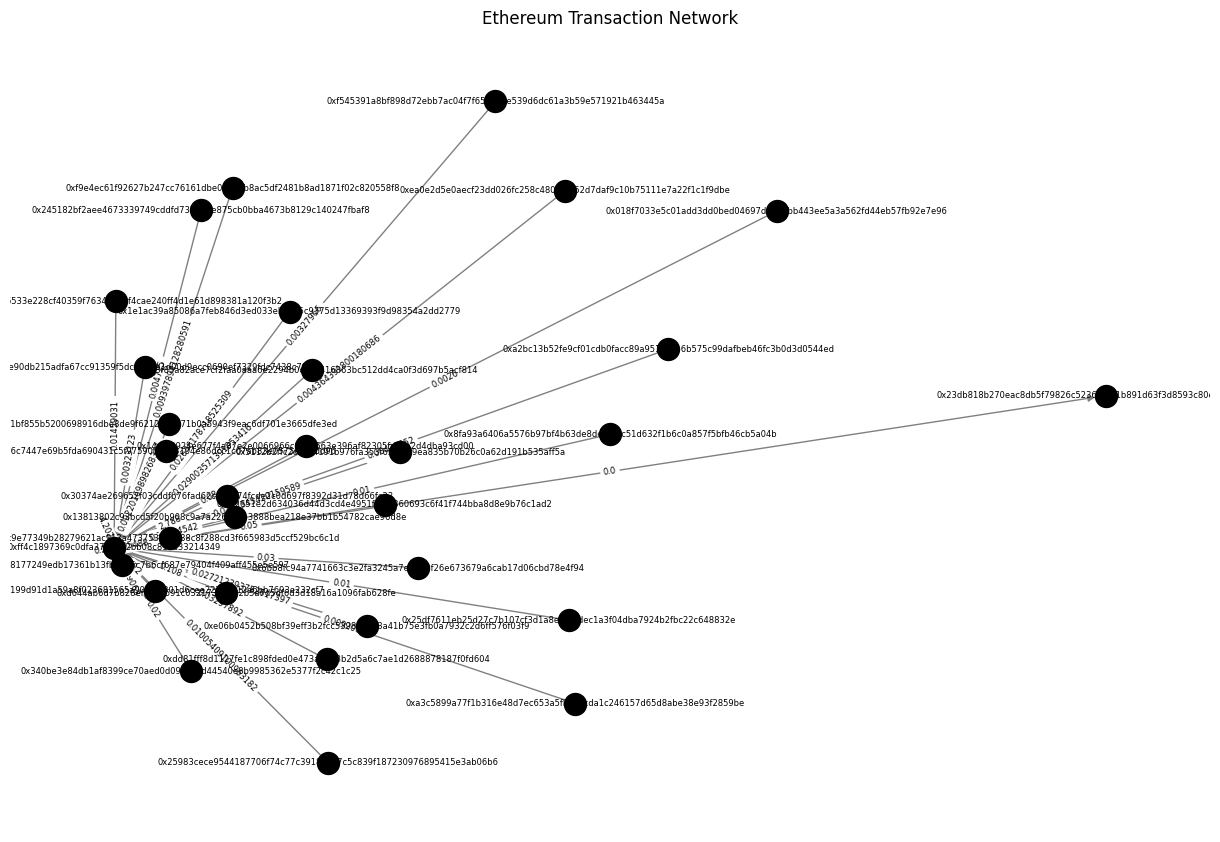

Total Incoming: 4.208051018434069 ETH
Total Outgoing: 4.202552410729063 ETH
Average Incoming Transaction Size: 0.1502875363726453 ETH
Average Outgoing Transaction Size: 2.1012762053645315 ETH


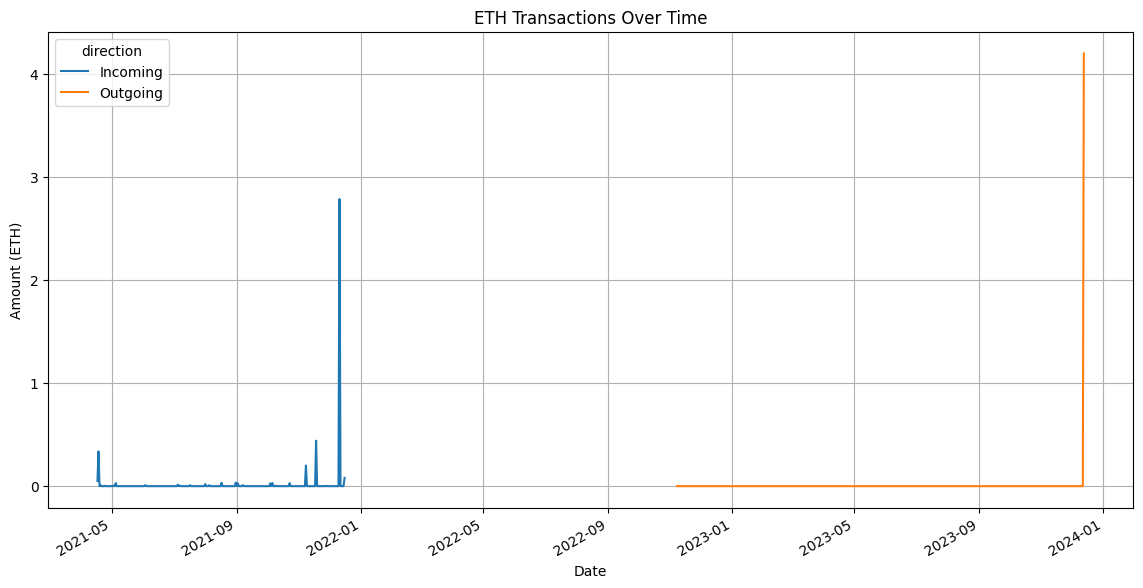


Top 5 Central Nodes:
Node: 0xff4c1897369c0dfa37e3442bb08c810a33214349, Centrality: 1.0000
Node: 0x3f2651e2d634036d44d3cd4e4951ff8c6360693c6f41f744bba8d8e9b76c1ad2, Centrality: 0.0333
Node: 0xea0e2d5e0aecf23dd026fc258c480bf5052d7daf9c10b75111e7a22f1c1f9dbe, Centrality: 0.0333
Node: 0xd644ab6d7b828ef8a5d591c0321733b4b2b5a7d5df6d3d18a16a1096fab628fe, Centrality: 0.0333
Node: 0x9e77349b28279621ac913a473753995688c8f288cd3f665983d5ccf529bc6c1d, Centrality: 0.0333


In [ ]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def get_eth_transactions(address, api_key):
    base_url = 'https://api.etherscan.io/api'
    txs_endpoint = f'?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&sort=asc&apikey={api_key}'
    url = f"{base_url}{txs_endpoint}"

    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error: {response.status_code}")
        return []

    transactions = response.json()['result']
    return transactions

def extract_eth_addresses(transactions, target_address):
    involved_addresses = []
    transactions_data = []

    for tx in transactions:
        txid = tx['hash']
        tx_time = datetime.fromtimestamp(int(tx['timeStamp']))  # Convert timestamp to datetime
        direction = "Outgoing" if tx['from'].lower() == target_address.lower() else "Incoming"
        amount = float(tx['value']) / (10 ** 18)  # Convert from Wei to Ether

        if direction == "Outgoing":
            involved_addresses.append((tx['from'], txid, direction, amount))
            involved_addresses.append((tx['to'], txid, None, amount))
        elif direction == "Incoming":
            involved_addresses.append((tx['to'], txid, direction, amount))
            involved_addresses.append((tx['from'], txid, None, amount))

        # Store transaction data for CSV
        transactions_data.append({
            'txid': txid,
            'time': tx_time,
            'direction': direction,
            'amount': amount
        })

    return involved_addresses, transactions_data

def plot_network_graph(involved_addresses):
    G = nx.DiGraph()

    for addr, txid, direction, amount in involved_addresses:
        if direction == "Outgoing":
            G.add_edge(addr, txid, weight=amount)
        elif direction == "Incoming":
            G.add_edge(txid, addr, weight=amount)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    # Adjust the node_size and font_size for a cleaner graph
    nx.draw(G, pos, with_labels=True, node_size=250, node_color="black", font_size=6, font_weight="normal", edge_color="gray")

    # Draw edge labels, if weights are available
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=6)

    plt.title("Ethereum Transaction Network")
    plt.show()

def analyze_transactions(transactions_data):
    # Convert transactions data into a DataFrame
    df = pd.DataFrame(transactions_data)

    # Calculate total incoming and outgoing amounts
    total_incoming = df[df['direction'] == 'Incoming']['amount'].sum()
    total_outgoing = df[df['direction'] == 'Outgoing']['amount'].sum()

    print(f"Total Incoming: {total_incoming} ETH")
    print(f"Total Outgoing: {total_outgoing} ETH")

    # Calculate average transaction amounts
    avg_incoming = df[df['direction'] == 'Incoming']['amount'].mean()
    avg_outgoing = df[df['direction'] == 'Outgoing']['amount'].mean()

    print(f"Average Incoming Transaction Size: {avg_incoming} ETH")
    print(f"Average Outgoing Transaction Size: {avg_outgoing} ETH")

    # Plotting time series data for incoming and outgoing transactions
    plt.figure(figsize=(14, 7))

    # Grouping by time to sum the amounts by date
    df.set_index('time', inplace=True)
    df.groupby(['direction']).resample('D').sum()['amount'].unstack(0).plot(ax=plt.gca())

    plt.title('ETH Transactions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Amount (ETH)')
    plt.grid(True)
    plt.show()

def identify_central_nodes(involved_addresses):
    G = nx.DiGraph()

    for addr, txid, direction, amount in involved_addresses:
        if direction == "Outgoing":
            G.add_edge(addr, txid, weight=amount)
        elif direction == "Incoming":
            G.add_edge(txid, addr, weight=amount)

    # Centrality measure (e.g., degree centrality)
    centrality = nx.degree_centrality(G)

    # Sort nodes by centrality
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    print("\nTop 5 Central Nodes:")
    for node, cent in sorted_centrality[:5]:
        print(f"Node: {node}, Centrality: {cent:.4f}")

def main():
    address = '0xFF4c1897369C0DFa37e3442BB08c810A33214349'  # Replace with the desired Ethereum address
    api_key = 'GQDUMSWVSPFCTT85MFPKKVMU69SJ6DW1ZB'  # Replace with your Etherscan API key

    transactions = get_eth_transactions(address, api_key)

    if transactions:
        involved_addresses, transactions_data = extract_eth_addresses(transactions, address)
        unique_txids = set(tx['txid'] for tx in transactions_data)

        print(f"Total unique transactions found: {len(unique_txids)}")
        print("Addresses involved, their transaction IDs, direction, and amount:")

        for addr, txid, direction, amount in involved_addresses:
            print(f"Address: {addr}, Transaction ID: {txid}, Direction: {direction}, Amount: {amount}")

        # Save transactions to a CSV file
        df = pd.DataFrame(transactions_data)
        df.to_csv("eth_transactions.csv", index=False)  # Save to CSV with a proper filename

        # Plot the network graph
        plot_network_graph(involved_addresses)

        # Analyze transactions for statistics and trends
        analyze_transactions(transactions_data)

        # Identify central nodes in the transaction graph
        identify_central_nodes(involved_addresses)

    else:
        print("No transactions found.")

if __name__ == "__main__":
    main()
